<a href="https://colab.research.google.com/github/ajnaik44/Assignment/blob/main/PE05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("mtcars.csv")

In [4]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [7]:
cars = df.drop(df.columns[[0]],axis=1)
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [9]:
from sklearn import preprocessing

x = cars.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
cars = pd.DataFrame(x_scaled)
cars.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,0.451064,0.5,0.221751,0.204947,0.525346,0.283048,0.233333,0.0,1.0,0.5,0.428571
1,0.451064,0.5,0.221751,0.204947,0.525346,0.348249,0.300000,0.0,1.0,0.5,0.428571
2,0.527660,0.0,0.092043,0.144876,0.502304,0.206341,0.489286,1.0,1.0,0.5,0.000000
3,0.468085,0.5,0.466201,0.204947,0.147465,0.435183,0.588095,1.0,0.0,0.0,0.000000
4,0.353191,1.0,0.720629,0.434629,0.179724,0.492713,0.300000,0.0,0.0,0.0,0.142857
5,0.327660,0.5,0.383886,0.187279,0.000000,0.497827,0.680952,1.0,0.0,0.0,0.000000
6,0.165957,1.0,0.720629,0.681979,0.207373,0.525952,0.159524,0.0,0.0,0.0,0.428571
7,0.595745,0.0,0.188576,0.035336,0.428571,0.428791,0.654762,1.0,0.0,0.5,0.142857
8,0.527660,0.0,0.173859,0.151943,0.534562,0.418563,1.000000,1.0,0.0,0.5,0.142857
9,0.374468,0.5,0.240708,0.250883,0.534562,0.492713,0.452381,1.0,0.0,0.5,0.428571


In [10]:


km3 = KMeans(n_clusters=3, init='k-means++', random_state= 42)

km3_pred = km3.fit_predict(cars)
   
print(km3_pred)
print(km3.cluster_centers_) 

[2 2 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 2 1 2 2 2 1]
[[0.19787234 1.         0.71468363 0.50235571 0.16628264 0.66251172
  0.31458333 0.         0.         0.         0.29761905]
 [0.60243161 0.14285714 0.1530485  0.13907118 0.50658328 0.28081967
  0.57542517 1.         0.5        0.42857143 0.1122449 ]
 [0.39787234 0.58333333 0.33703334 0.45524146 0.54147465 0.34377397
  0.15436508 0.         1.         0.83333333 0.52380952]]


In [11]:


km10 = KMeans(n_clusters=10, init='k-means++', random_state= 42)

km10_pred = km10.fit_predict(cars)
print(km10_pred)
print(km10.cluster_centers_) 

[4 4 1 5 8 5 0 2 2 6 6 8 8 8 7 7 7 1 1 1 2 8 8 0 8 1 9 1 3 4 3 1]
[[0.14468085 1.         0.70815665 0.6819788  0.32718894 0.56047047
  0.13392857 0.         0.         0.         0.42857143]
 [0.76474164 0.         0.04664505 0.10095911 0.63989467 0.13175293
  0.5        1.         1.         0.57142857 0.06122449]
 [0.53191489 0.         0.16155317 0.11542992 0.46543779 0.36358987
  0.7702381  1.         0.         0.33333333 0.0952381 ]
 [0.21276596 1.         0.63581941 0.8745583  0.51612903 0.47481463
  0.00595238 0.         1.         1.         0.71428571]
 [0.43262411 0.5        0.20927912 0.28150766 0.48233487 0.31756584
  0.21746032 0.         1.         0.66666667 0.52380952]
 [0.39787234 0.5        0.42504365 0.19611307 0.07373272 0.46650473
  0.63452381 1.         0.         0.         0.        ]
 [0.34468085 0.5        0.24070841 0.25088339 0.53456221 0.49271286
  0.48809524 1.         0.         0.5        0.42857143]
 [0.06099291 1.         0.96341565 0.58186101 0.1351

In [12]:


km20 = KMeans(n_clusters=20, init='k-means++', random_state= 42)

km20_pred = km20.fit_predict(cars)
print(km20_pred)
print(km20.cluster_centers_) 

[ 7  7 14  6 17  6 16  8 19  5  5  9  9  9 10 10 10 18 15 18  3  1  1 16
 17  2  0 13 12 11  4 14]
[[0.66382979 0.         0.12272387 0.13780919 0.76958525 0.16031705
  0.26190476 0.         1.         1.         0.14285714]
 [0.2106383  1.         0.59840359 0.34628975 0.08986175 0.5023012
  0.3077381  0.         0.         0.         0.14285714]
 [0.71914894 0.         0.01970566 0.04946996 0.60829493 0.10790079
  0.52380952 1.         1.         0.5        0.        ]
 [0.47234043 0.         0.12222499 0.1590106  0.43317972 0.24341601
  0.65595238 1.         0.         0.         0.        ]
 [0.19574468 1.         0.57345972 1.         0.359447   0.52595244
  0.01190476 0.         1.         1.         1.        ]
 [0.34468085 0.5        0.24070841 0.25088339 0.53456221 0.49271286
  0.48809524 1.         0.         0.5        0.42857143]
 [0.39787234 0.5        0.42504365 0.19611307 0.07373272 0.46650473
  0.63452381 1.         0.         0.         0.        ]
 [0.45106383 0.5    

[0 1 2]


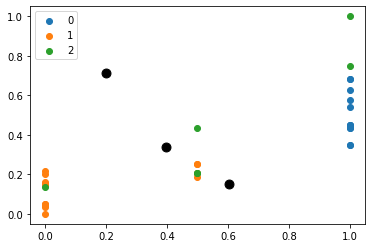

In [47]:
import matplotlib.pyplot as mtp
km3.labels_
#Getting unique labels
X=cars.iloc[:, [1,3]].values

label =   km3_pred
u_labels = np.unique(label)
print(u_labels)
centroids = km3.cluster_centers_
#plotting the results:
 
for i in u_labels:
    mtp.scatter(X[label == i , 0] , X[label == i , 1] , label = i)

mtp.scatter(centroids[:,0] , centroids[:,2] , s = 80, color = 'k')
mtp.legend()
mtp.show()


[0 1 2 3 4 5 6 7 8 9]


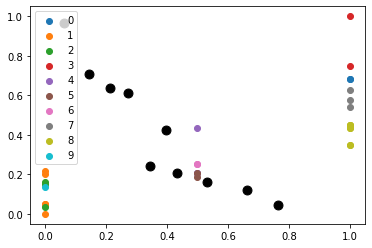

In [48]:
import matplotlib.pyplot as mtp
X=cars.iloc[:, [1,3]].values
#Getting unique labels
label =   km10_pred
u_labels = np.unique(label)
print(u_labels)
centroids = km10.cluster_centers_
#plotting the results:
 
for i in u_labels:
    mtp.scatter(X[label == i , 0] ,X[label == i , 1] , label = i)

mtp.scatter(centroids[:,0] , centroids[:,2] , s = 80, color = 'k')
mtp.legend()
mtp.show()


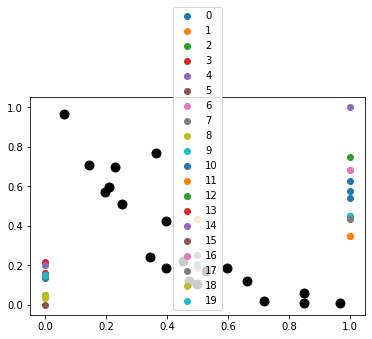

In [50]:
import matplotlib.pyplot as mtp
X=cars.iloc[:, [1,3]].values
#Getting unique labels
label =   km20_pred
u_labels = np.unique(label)

centroids = km20.cluster_centers_
#plotting the results:
 
for i in u_labels:
    mtp.scatter(X[label == i , 0] , X[label == i , 1] , label = i)

mtp.scatter(centroids[:,0] , centroids[:,2] , s = 80, color = 'k')
mtp.legend()
mtp.show()


In [ ]:

centroids = km10.cluster_centers_
filtered_label0 = df[km10.labels_ == 0]
filtered_label0 = filtered_label0.drop(filtered_label0.columns[[0]],axis=1)
mtp.scatter(filtered_label0["mpg"], filtered_label0["hp"] )
mtp.scatter(centroids[:,0] , centroids[:,3] , s = 80, color = 'k')

mtp.show()



In [ ]:

_
centroids = km20.cluster_centers_
filtered_label0 = df[km20.labels_ == 0]
filtered_label0 = filtered_label0.drop(filtered_label0.columns[[0]],axis=1)
mtp.scatter(filtered_label0["mpg"], filtered_label0["hp"] )
mtp.scatter(centroids[:,0] , centroids[:,3] , s = 80, color = 'k')

mtp.show()



In [ ]:
#4.	Which of k=3, k=10, and k-20 provide the best clusters for this given pair of features? Explain.
# From the plot k 3 provide clear 3 cluster where as k10,k20 doesnt provide plot  with 10 and 20 cluster, So k3 in the best clusters.

In [ ]:
from sklearn.model_selection import GridSearchCV
km3 = KMeans()

param_grid = [
{'n_clusters': range(1,20) , 'random_state': [42]}
]
grid_clf = GridSearchCV(km3,param_grid,cv=3)
grid_clf.fit(cars)
print(grid_clf.best_params_)
print(grid_clf.best_score_)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(cars)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1


In [ ]:
#a.	What is the dimension d?
print(d)

In [ ]:
#b.	The dataset started with 11 dimensions, is d a significant dimensionality reduction?
# The dataset reduce to 5 from 11 dimensions

In [ ]:
# c.	What are the benefits of this dimensionality reduction?

#It helps in data compression by reducing features. It reduces storage. 
#It makes machine learning algorithms computationally efficient. It also helps remove redundant features and noise.

In [ ]:
# d.	What are possible disadvantages of dimensionality reduction?

#It may lead to some amount of data loss. Data Normalization is required 

In [ ]:
X_reduced

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
PC_values = np.arange(pca.n_components_) +1
mtp.plot( PC_values,pca.explained_variance_ratio_,  linewidth=2)
mtp.title('Scree Plot')
mtp.ylabel('Explained Variance')
mtp.xlabel('Dimensions')
mtp.show()
